In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os,sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import helper
import simulation

# Generate some random images
input_images, target_masks, centers = simulation.generate_random_data_center(192, 192, count=3)

for x in [input_images, target_masks, centers]:
    print(x.shape)
    print(x.min(), x.max())

# Change channel-order and make 3 channels for matplot
input_images_rgb = [x.astype(np.uint8) for x in input_images]

# Map each channel (i.e. class) to each color
target_masks_rgb = [helper.masks_to_colorimg(x) for x in target_masks]

# Map each channel (i.e. class) to each color
target_centers_rgb = [helper.masks_to_colorimg(x) for x in centers]


# Left: Input image, Right: Target mask (Ground-truth)
helper.plot_side_by_side([input_images_rgb, target_masks_rgb, target_centers_rgb])

(3, 192, 192, 3)
0 255
(3, 6, 192, 192)
0.0 1.0
(3, 6, 192, 192)
0.0 1.0


TypeError: masks_to_colorimg() missing 1 required positional argument: 'n_class'

In [179]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os,sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import helper
import simulation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(1, 192, 192, 3) 0 255
(1, 6, 192, 192) 0 1
(1, 13, 192, 192) 0 1
(1, 6, 192, 192) 0 1
(1, 6, 192, 192) 0 36
(1, 6, 192, 192) 0 36


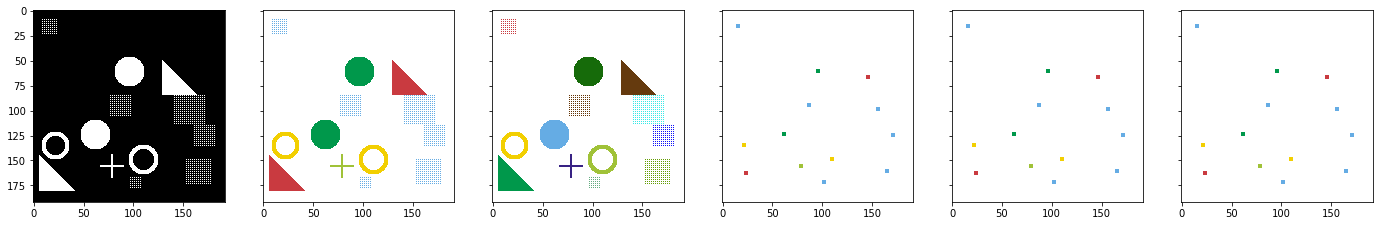

In [79]:
# new data generation method

%matplotlib inline
%load_ext autoreload
%autoreload 2

import os,sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import helper
import simulation

input_images, class_masks, instance_masks, center_masks, width_masks, height_masks = simulation.generate_random_data_pack_mask_instance_center_width_height(192, 192, count=1, one_class_only = False)

print(input_images.shape, input_images.min(), input_images.max())
print(class_masks.shape, class_masks.min(), class_masks.max())
print(instance_masks.shape, instance_masks.min(), instance_masks.max())
print(center_masks.shape, center_masks.min(), center_masks.max())
print(width_masks.shape, width_masks.min(), width_masks.max())
print(height_masks.shape, height_masks.min(), height_masks.max())


# for i in range(len(instance_masks)):
#     print(i, instance_masks[i].shape, instance_masks[i].min(), instance_masks[i].max())

# Change channel-order and make 3 channels for matplot
input_images_rgb = [x.astype(np.uint8) for x in input_images]

# Map each channel (i.e. class) to each color
target_masks_rgb = [helper.masks_to_colorimg2(x) for x in class_masks]


# Map each channel (i.e. class) to each color
instance_masks_rgb = [helper.masks_to_colorimg2(x) for x in instance_masks]

# Map each channel (i.e. class) to each color
center_masks_rgb = [helper.masks_to_colorimg2(x) for x in center_masks]


# Map each channel (i.e. class) to each color
width_masks_rgb = [helper.masks_to_colorimg2(x) for x in width_masks]

# Map each channel (i.e. class) to each color
height_masks_rgb = [helper.masks_to_colorimg2(x) for x in height_masks]


# Left: Input image, Right: Target mask (Ground-truth)
helper.plot_side_by_side([input_images_rgb, target_masks_rgb, instance_masks_rgb, center_masks_rgb, width_masks_rgb, height_masks_rgb ])

In [106]:
print(input_images[0].dtype)
print(center_masks[0].dtype)
print(class_masks[0].dtype)
print(instance_masks[0].dtype)
print(width_masks[0].dtype)
print(height_masks[0].dtype)

print(type(input_images))
print(type(center_masks))
print(type(class_masks))
print(type(width_masks))
print(type(height_masks))

# sum(width_masks[0][5])

uint8
uint8
uint8
uint8
uint8
uint8
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [47]:
sum(height_masks[0][5])
sum(width_masks[0][5])
sum(center_masks[0][5])
class_masks[0][5]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [180]:
# new data generation method

%matplotlib inline
%load_ext autoreload
%autoreload 2

import os,sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import helper
import simulation


from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets, models

class SimDataset(Dataset):
    def __init__(self, count, n_class, transform=None):
#         self.input_images, self.target_masks, self.target_centers = simulation.generate_random_data_center(192, 192, count=count)        
        self.input_images, self.target_masks, _, self.target_centers, self.target_widths, self.target_heights = simulation.generate_random_data_pack_mask_instance_center_width_height(192, 192, count=count, n_class=n_class)        
        self.transform = transform
    
    def __len__(self):
        return len(self.input_images)
    
    def __getitem__(self, idx):        
        image = self.input_images[idx]
        mask = self.target_masks[idx]
        center = self.target_centers[idx]
        width = self.target_widths[idx]
        height = self.target_heights[idx]
        if self.transform:
            image = self.transform(image)
        
        return [image, mask, center, width, height]

# use same transform for train/val for this example
trans = transforms.Compose([
    transforms.ToTensor(),
])

n_class = 6
train_set = SimDataset(6000, n_class, transform = trans)
val_set = SimDataset(500, n_class, transform = trans)

image_datasets = {
    'train': train_set, 'val': val_set
}

batch_size = 25

dataloaders = {
    'train': DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0),
    'val': DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=0)
}

dataset_sizes = {
    x: len(image_datasets[x]) for x in image_datasets.keys()
}

dataset_sizes

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


{'train': 6000, 'val': 500}

torch.Size([25, 3, 192, 192]) torch.Size([25, 6, 192, 192]) torch.Size([25, 6, 192, 192]) torch.Size([25, 6, 192, 192]) torch.Size([25, 6, 192, 192])
0.0 1.0 0.09817275 0.2975481
0 1 0.016423430266203704 0.12709721163147036
0 1 0.0007899305555555555 0.028094600286762573


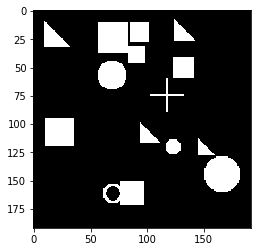

In [183]:
import torchvision.utils

def reverse_transform(inp):
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    inp = (inp * 255).astype(np.uint8)
    
    return inp

# Get a batch of training data
inputs, masks, centers, widths, heights = next(iter(dataloaders['train']))

print(inputs.shape, masks.shape, centers.shape, widths.shape, heights.shape)
for x in [inputs.numpy(), masks.numpy(), centers.numpy()]:
    print(x.min(), x.max(), x.mean(), x.std())

plt.imshow(reverse_transform(inputs[3]))

In [78]:
# inputs, masks, centers = next(iter(dataloaders['train']))

In [7]:
import torch
centers[0][0].shape
torch.sum(centers[0][0])

tensor(9.)

In [5]:
# from torchsummary import summary
# import torch
# import torch.nn as nn
# from pytorchunet import pytorch_unet
# import models

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# # model = pytorch_unet.UNet(6)
# # model = models.ObjectDetectUNet(6)
# # model = models.InstanceUNet(6,3)
# model = models.ObjectDetectUNet(6)
# model = model.to(device)

# summary(model, input_size=(3, 224, 224))

In [184]:
from tqdm import tqdm
import time
import copy
import numpy as np
import torch
from metrics import MetricsCollection

def train_model(model, optimizer, lr_scheduler, loaders, device, max_epochs=50):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    has_waited = 0
    stop_training = False
    earlystop_patience = 5

    epoch_metrics = MetricsCollection()

    for epoch in range(max_epochs):
        print('Epoch {}/{}'.format(epoch, max_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            batch_metrics = MetricsCollection()

            loader = loaders[phase]

            pbar = tqdm(loader, total=len(loader), desc="Epoch {} {}".format(epoch, phase), ncols=0)
            for i, (inputs, class_masks, center_masks, width_masks, height_masks) in enumerate(pbar):
                inputs = inputs.to(device)
                class_masks = class_masks.to(device)
                center_masks = center_masks.to(device)
                width_masks = width_masks.to(device)
                height_masks = height_masks.to(device)

                optimizer.zero_grad()

                # compute output
                with torch.set_grad_enabled(phase == 'train'):
                    outputs, losses  = model(inputs, class_masks, center_masks, width_masks, height_masks)

                if phase == 'train':
                    loss = losses['loss']
                    loss.backward()
                    optimizer.step()

                for k, v in losses.items():
                    batch_metrics.add(phase, k, v.item())

                pbar.set_postfix(**{k: "{:.5f}".format(meter.avg) for k, meter in batch_metrics[phase].items()})

            for key, meter in batch_metrics[phase].items():
                epoch_metrics.add(phase, key, meter.avg)

                print('{}_{}'.format(phase, key), meter.avg)

            if phase == 'val':
                # monitor the val metrics
                best_epoch_index = epoch_metrics['val']['loss'].best()[1]
                if best_epoch_index == epoch:
                    has_waited = 1
                    best_model_wts = copy.deepcopy(model.state_dict())
                    print("Saving the best model state dict")
                else:
                    if has_waited >= earlystop_patience:
                        print("** Early stop in training: {} waits **".format(has_waited))
                        stop_training = True

                    has_waited += 1

                if type(lr_scheduler) is torch.optim.lr_scheduler.ReduceLROnPlateau:
                    lr_scheduler.step(epoch_metrics['val']['loss'].value)
                else:
                    lr_scheduler.step()

        print()  # end of epoch
        if stop_training:
            break

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

    # load best model weights
    model.load_state_dict(best_model_wts)

    return model

import models

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_class = 6
lr_factor = 0.1
lr_patience = 1
lr = 1e-4

# model = models.InstanceUNet(num_class).to(device)
# model = models.ObjectDetectUNet(num_class).to(device)
model = models.WidthHeightUNet(num_class).to(device)



optimizer = torch.optim.Adam(model.parameters(), lr=lr)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                          factor=lr_factor,
                                                          patience=lr_patience,
                                                          verbose=True)
        
model = train_model(model, optimizer, lr_scheduler, dataloaders, device)
torch.save(model, './models/model_last.pth')

Epoch 0 train:   0% 0/240 [00:00<?, ?it/s]

Epoch 0/49
----------


/home/ali/miniconda3/envs/deploy3/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
Epoch 0 train: 100% 240/240 [02:06<00:00,  1.88it/s, bce_center=0.04090, bce_mask=0.10062, dice=0.71962, dice_center=0.83332, l2_height=0.04350, l2_width=0.04329, loss=1.78126]
Epoch 0 val:   5% 1/20 [00:00<00:03,  6.11it/s, bce_center=0.01608, bce_mask=0.02117, dice=0.26751, dice_center=0.80852, l2_height=0.00852, l2_width=0.00995, loss=1.13175]

train_bce_mask 0.10061692299786955
train_dice 0.7196218454589446
train_bce_center 0.040895108583693704
train_dice_center 0.8333236629764239
train_l2_width 0.043294919181304674
train_l2_height 0.04350291839994801
train_loss 1.7812553788224856


Epoch 0 val: 100% 20/20 [00:03<00:00,  6.14it/s, bce_center=0.01620, bce_mask=0.01943, dice=0.29186, dice_center=0.81214, l2_height=0.00911, l2_width=0.01050, loss=1.15923]
Epoch 1 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.01942677889019251
val_dice 0.2918553002178669
val_bce_center 0.01619859109632671
val_dice_center 0.8121444672346115
val_l2_width 0.010500316135585308
val_l2_height 0.009107675543054939
val_loss 1.159233146905899
Saving the best model state dict

Epoch 1/49
----------


Epoch 1 train: 100% 240/240 [02:09<00:00,  1.86it/s, bce_center=0.01005, bce_mask=0.01312, dice=0.18832, dice_center=0.75219, l2_height=0.00556, l2_width=0.00535, loss=0.97459]
Epoch 1 val:   5% 1/20 [00:00<00:03,  5.96it/s, bce_center=0.00756, bce_mask=0.00727, dice=0.17184, dice_center=0.60275, l2_height=0.00482, l2_width=0.00457, loss=0.79881]

train_bce_mask 0.013120556244393811
train_dice 0.18831504248082637
train_bce_center 0.010054711491102352
train_dice_center 0.7521915954848131
train_l2_width 0.0053535435882319385
train_l2_height 0.005555951199494302
train_loss 0.9745914041996002


Epoch 1 val: 100% 20/20 [00:03<00:00,  6.22it/s, bce_center=0.00769, bce_mask=0.00809, dice=0.16795, dice_center=0.62088, l2_height=0.00506, l2_width=0.00463, loss=0.81430]
Epoch 2 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.008087795018218458
val_dice 0.16795058995485307
val_bce_center 0.007692498830147087
val_dice_center 0.6208820849657058
val_l2_width 0.004627204348798842
val_l2_height 0.0050647757132537665
val_loss 0.8143049448728561
Saving the best model state dict

Epoch 2/49
----------


Epoch 2 train: 100% 240/240 [02:10<00:00,  1.84it/s, bce_center=0.00431, bce_mask=0.00439, dice=0.07585, dice_center=0.47724, l2_height=0.00439, l2_width=0.00435, loss=0.57054]
Epoch 2 val:   5% 1/20 [00:00<00:03,  6.17it/s, bce_center=0.00244, bce_mask=0.00135, dice=0.02287, dice_center=0.35706, l2_height=0.00319, l2_width=0.00336, loss=0.39026]

train_bce_mask 0.0043915428813003626
train_dice 0.07585301472960661
train_bce_center 0.0043117918374870595
train_dice_center 0.47724253361423813
train_l2_width 0.004349439211849434
train_l2_height 0.004391000143368728
train_loss 0.5705393212536971


Epoch 2 val: 100% 20/20 [00:03<00:00,  6.16it/s, bce_center=0.00276, bce_mask=0.00200, dice=0.02718, dice_center=0.38475, l2_height=0.00333, l2_width=0.00360, loss=0.42361]
Epoch 3 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0019958131713792683
val_dice 0.027183519396930932
val_bce_center 0.002758236334193498
val_dice_center 0.3847505196928978
val_l2_width 0.0035970666212961078
val_l2_height 0.003328665031585842
val_loss 0.4236138239502907
Saving the best model state dict

Epoch 3/49
----------


Epoch 3 train: 100% 240/240 [02:10<00:00,  1.85it/s, bce_center=0.00195, bce_mask=0.00266, dice=0.02166, dice_center=0.28704, l2_height=0.00404, l2_width=0.00412, loss=0.32148]
Epoch 3 val:   5% 1/20 [00:00<00:03,  6.05it/s, bce_center=0.00115, bce_mask=0.00212, dice=0.01222, dice_center=0.19188, l2_height=0.00306, l2_width=0.00313, loss=0.21355]

train_bce_mask 0.002664304840436671
train_dice 0.021656994036554047
train_bce_center 0.0019527165679998385
train_dice_center 0.2870428570235769
train_l2_width 0.0041162108886055645
train_l2_height 0.004042068307171576
train_loss 0.32147515285760164


Epoch 3 val: 100% 20/20 [00:03<00:00,  6.07it/s, bce_center=0.00124, bce_mask=0.00237, dice=0.01663, dice_center=0.20017, l2_height=0.00301, l2_width=0.00306, loss=0.22647]
Epoch 4 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.002367900835815817
val_dice 0.0166271414142102
val_bce_center 0.0012425220629666
val_dice_center 0.20016970559954644
val_l2_width 0.0030588931986130774
val_l2_height 0.0030058052041567864
val_loss 0.2264719672501087
Saving the best model state dict

Epoch 4/49
----------


Epoch 4 train: 100% 240/240 [02:10<00:00,  1.84it/s, bce_center=0.00109, bce_mask=0.00239, dice=0.01530, dice_center=0.17510, l2_height=0.00274, l2_width=0.00284, loss=0.19946]
Epoch 4 val:   5% 1/20 [00:00<00:03,  5.92it/s, bce_center=0.00069, bce_mask=0.00223, dice=0.01081, dice_center=0.13223, l2_height=0.00220, l2_width=0.00240, loss=0.15056]

train_bce_mask 0.0023920203961703616
train_dice 0.015295983986773839
train_bce_center 0.001090846024211108
train_dice_center 0.17509788864602646
train_l2_width 0.0028379999799653887
train_l2_height 0.0027404948996263556
train_loss 0.19945523347705602


Epoch 4 val: 100% 20/20 [00:03<00:00,  6.06it/s, bce_center=0.00078, bce_mask=0.00222, dice=0.01317, dice_center=0.13892, l2_height=0.00213, l2_width=0.00231, loss=0.15953]
Epoch 5 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.002218817645916715
val_dice 0.013171347742900252
val_bce_center 0.0007769398158416152
val_dice_center 0.1389227069914341
val_l2_width 0.0023076406796462834
val_l2_height 0.002131516847293824
val_loss 0.15952896773815156
Saving the best model state dict

Epoch 5/49
----------


Epoch 5 train: 100% 240/240 [02:10<00:00,  1.85it/s, bce_center=0.00080, bce_mask=0.00215, dice=0.01249, dice_center=0.12589, l2_height=0.00229, l2_width=0.00236, loss=0.14598]
Epoch 5 val:   5% 1/20 [00:00<00:03,  6.17it/s, bce_center=0.00089, bce_mask=0.00277, dice=0.01328, dice_center=0.12243, l2_height=0.00222, l2_width=0.00244, loss=0.14402]

train_bce_mask 0.002152346812363248
train_dice 0.01249125439596052
train_bce_center 0.0007955907240102533
train_dice_center 0.1258898767332236
train_l2_width 0.0023603456182172524
train_l2_height 0.00228699160021885
train_loss 0.14597640611852208


Epoch 5 val: 100% 20/20 [00:03<00:00,  6.19it/s, bce_center=0.00075, bce_mask=0.00209, dice=0.01305, dice_center=0.12063, l2_height=0.00184, l2_width=0.00203, loss=0.14040]
Epoch 6 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.002094618207775056
val_dice 0.013045470975339413
val_bce_center 0.0007487067137844861
val_dice_center 0.12063450179994106
val_l2_width 0.0020332742773462088
val_l2_height 0.0018386362702585758
val_loss 0.14039520919322968
Saving the best model state dict

Epoch 6/49
----------


Epoch 6 train: 100% 240/240 [02:10<00:00,  1.85it/s, bce_center=0.00066, bce_mask=0.00197, dice=0.01081, dice_center=0.10001, l2_height=0.00202, l2_width=0.00207, loss=0.11753]
Epoch 6 val:   0% 0/20 [00:00<?, ?it/s]

train_bce_mask 0.001965065742357789
train_dice 0.01081057876193275
train_bce_center 0.0006556556247232948
train_dice_center 0.10000828048214316
train_l2_width 0.0020655342455332478
train_l2_height 0.0020231737284727084
train_loss 0.1175282888735334


Epoch 6 val: 100% 20/20 [00:03<00:00,  6.08it/s, bce_center=0.00067, bce_mask=0.00176, dice=0.01061, dice_center=0.10611, l2_height=0.00194, l2_width=0.00184, loss=0.12293]
Epoch 7 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0017572112323250622
val_dice 0.010610377439297736
val_bce_center 0.0006734876806149259
val_dice_center 0.106114561855793
val_l2_width 0.0018433459219522775
val_l2_height 0.001935163710732013
val_loss 0.12293414734303951
Saving the best model state dict

Epoch 7/49
----------


Epoch 7 train: 100% 240/240 [02:10<00:00,  1.84it/s, bce_center=0.00056, bce_mask=0.00177, dice=0.00941, dice_center=0.08239, l2_height=0.00186, l2_width=0.00189, loss=0.09787]
Epoch 7 val:   5% 1/20 [00:00<00:03,  5.65it/s, bce_center=0.00040, bce_mask=0.00207, dice=0.01110, dice_center=0.07357, l2_height=0.00149, l2_width=0.00153, loss=0.09017]

train_bce_mask 0.0017661419937212487
train_dice 0.009411341613546636
train_bce_center 0.0005554995934896093
train_dice_center 0.08239462918912371
train_l2_width 0.0018878020152139168
train_l2_height 0.001857405084107692
train_loss 0.097872819720457


Epoch 7 val: 100% 20/20 [00:03<00:00,  6.09it/s, bce_center=0.00046, bce_mask=0.00158, dice=0.00918, dice_center=0.07003, l2_height=0.00152, l2_width=0.00154, loss=0.08431]
Epoch 8 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0015820453874766827
val_dice 0.009180674189701676
val_bce_center 0.00045517387188738213
val_dice_center 0.07002822626382113
val_l2_width 0.0015371135086752474
val_l2_height 0.0015246968134306372
val_loss 0.08430793061852455
Saving the best model state dict

Epoch 8/49
----------


Epoch 8 train: 100% 240/240 [02:10<00:00,  1.83it/s, bce_center=0.00048, bce_mask=0.00163, dice=0.00863, dice_center=0.06740, l2_height=0.00171, l2_width=0.00173, loss=0.08158]
Epoch 8 val:   5% 1/20 [00:00<00:03,  6.06it/s, bce_center=0.00038, bce_mask=0.00134, dice=0.00779, dice_center=0.06621, l2_height=0.00140, l2_width=0.00149, loss=0.07860]

train_bce_mask 0.0016337999380387676
train_dice 0.008627413519813368
train_bce_center 0.0004752190319171253
train_dice_center 0.06740137501619756
train_l2_width 0.0017318018959485925
train_l2_height 0.0017080710817632887
train_loss 0.08157768066351613


Epoch 8 val: 100% 20/20 [00:03<00:00,  6.07it/s, bce_center=0.00045, bce_mask=0.00151, dice=0.00868, dice_center=0.06448, l2_height=0.00148, l2_width=0.00151, loss=0.07812]
Epoch 9 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0015109167870832607
val_dice 0.008684483706019819
val_bce_center 0.00044633520592469723
val_dice_center 0.06448376737535
val_l2_width 0.0015112008841242641
val_l2_height 0.0014786985819227993
val_loss 0.0781154029071331
Saving the best model state dict

Epoch 9/49
----------


Epoch 9 train: 100% 240/240 [02:10<00:00,  1.83it/s, bce_center=0.00042, bce_mask=0.00150, dice=0.00780, dice_center=0.05670, l2_height=0.00152, l2_width=0.00155, loss=0.06949]
Epoch 9 val:   5% 1/20 [00:00<00:03,  5.13it/s, bce_center=0.00046, bce_mask=0.00232, dice=0.01151, dice_center=0.05785, l2_height=0.00169, l2_width=0.00171, loss=0.07553]

train_bce_mask 0.001502721902943449
train_dice 0.007802758763621871
train_bce_center 0.0004173049791158216
train_dice_center 0.05670409332960844
train_l2_width 0.0015456414650543593
train_l2_height 0.0015196951867740911
train_loss 0.0694922155700624


Epoch 9 val: 100% 20/20 [00:03<00:00,  6.04it/s, bce_center=0.00037, bce_mask=0.00139, dice=0.00784, dice_center=0.05310, l2_height=0.00126, l2_width=0.00130, loss=0.06526]
Epoch 10 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.001390134505345486
val_dice 0.007839154312387108
val_bce_center 0.0003679334171465598
val_dice_center 0.053098450787365435
val_l2_width 0.0012973866192623972
val_l2_height 0.0012620438123121859
val_loss 0.06525510288774967
Saving the best model state dict

Epoch 10/49
----------


Epoch 10 train: 100% 240/240 [02:10<00:00,  1.84it/s, bce_center=0.00037, bce_mask=0.00140, dice=0.00729, dice_center=0.04854, l2_height=0.00142, l2_width=0.00143, loss=0.06044]
Epoch 10 val:   5% 1/20 [00:00<00:03,  6.15it/s, bce_center=0.00026, bce_mask=0.00211, dice=0.00953, dice_center=0.04391, l2_height=0.00143, l2_width=0.00147, loss=0.05871]

train_bce_mask 0.0013991190627469527
train_dice 0.007290859411781033
train_bce_center 0.0003718046657013474
train_dice_center 0.048542356103037795
train_l2_width 0.0014251930357810731
train_l2_height 0.0014151731050030018
train_loss 0.06044450563689073


Epoch 10 val: 100% 20/20 [00:03<00:00,  6.12it/s, bce_center=0.00032, bce_mask=0.00131, dice=0.00758, dice_center=0.04351, l2_height=0.00123, l2_width=0.00124, loss=0.05520]
Epoch 11 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0013103929843055085
val_dice 0.007579565583728254
val_bce_center 0.00032494430342921987
val_dice_center 0.043510308116674425
val_l2_width 0.0012411677569616586
val_l2_height 0.001234460243722424
val_loss 0.05520083829760551
Saving the best model state dict

Epoch 11/49
----------


Epoch 11 train: 100% 240/240 [02:10<00:00,  1.81it/s, bce_center=0.00035, bce_mask=0.00132, dice=0.00684, dice_center=0.04339, l2_height=0.00139, l2_width=0.00141, loss=0.05471]
Epoch 11 val:   5% 1/20 [00:00<00:03,  5.86it/s, bce_center=0.00042, bce_mask=0.00082, dice=0.00647, dice_center=0.04466, l2_height=0.00116, l2_width=0.00112, loss=0.05464]

train_bce_mask 0.0013242777885655718
train_dice 0.006843231321545318
train_bce_center 0.0003526698910718551
train_dice_center 0.04338861966971308
train_l2_width 0.0014074825123922589
train_l2_height 0.0013900953332874149
train_loss 0.054706376511603594


Epoch 11 val: 100% 20/20 [00:03<00:00,  6.08it/s, bce_center=0.00033, bce_mask=0.00124, dice=0.00738, dice_center=0.04389, l2_height=0.00126, l2_width=0.00122, loss=0.05531]
Epoch 12 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0012372028664685785
val_dice 0.007378710131160915
val_bce_center 0.00032631255671731194
val_dice_center 0.0438889442011714
val_l2_width 0.0012234214111231268
val_l2_height 0.0012601779249962418
val_loss 0.05531476829200983

Epoch 12/49
----------


Epoch 12 train: 100% 240/240 [02:10<00:00,  1.84it/s, bce_center=0.00030, bce_mask=0.00122, dice=0.00634, dice_center=0.03509, l2_height=0.00131, l2_width=0.00131, loss=0.04557]
Epoch 12 val:   5% 1/20 [00:00<00:03,  6.10it/s, bce_center=0.00018, bce_mask=0.00087, dice=0.00603, dice_center=0.02874, l2_height=0.00104, l2_width=0.00102, loss=0.03788]

train_bce_mask 0.0012232625243389823
train_dice 0.00634425378520973
train_bce_center 0.00029845256849512223
train_dice_center 0.03508869969906906
train_l2_width 0.0013091449734929483
train_l2_height 0.0013072838138517304
train_loss 0.04557109748323759


Epoch 12 val: 100% 20/20 [00:03<00:00,  6.06it/s, bce_center=0.00029, bce_mask=0.00126, dice=0.00679, dice_center=0.03562, l2_height=0.00126, l2_width=0.00123, loss=0.04646]
Epoch 13 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0012616681429790332
val_dice 0.006785193365067244
val_bce_center 0.0002944329542515334
val_dice_center 0.03562233159318566
val_l2_width 0.0012346625968348234
val_l2_height 0.0012583954958245158
val_loss 0.04645668361335993
Saving the best model state dict

Epoch 13/49
----------


Epoch 13 train: 100% 240/240 [02:10<00:00,  1.82it/s, bce_center=0.00027, bce_mask=0.00117, dice=0.00612, dice_center=0.03053, l2_height=0.00124, l2_width=0.00126, loss=0.04060]
Epoch 13 val:   5% 1/20 [00:00<00:03,  5.95it/s, bce_center=0.00032, bce_mask=0.00098, dice=0.00769, dice_center=0.03800, l2_height=0.00128, l2_width=0.00127, loss=0.04953]

train_bce_mask 0.001171879839967005
train_dice 0.0061238804628374055
train_bce_center 0.00027373316276377106
train_dice_center 0.030532210071881612
train_l2_width 0.0012555986165049642
train_l2_height 0.0012434500468467983
train_loss 0.04060075213201344


Epoch 13 val: 100% 20/20 [00:03<00:00,  6.11it/s, bce_center=0.00028, bce_mask=0.00116, dice=0.00698, dice_center=0.03329, l2_height=0.00113, l2_width=0.00109, loss=0.04393]
Epoch 14 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0011608556058490648
val_dice 0.006977832363918424
val_bce_center 0.000275777551723877
val_dice_center 0.033289145305752756
val_l2_width 0.0010906144889304414
val_l2_height 0.0011333899426972493
val_loss 0.043927616253495214
Saving the best model state dict

Epoch 14/49
----------


Epoch 14 train: 100% 240/240 [02:10<00:00,  1.84it/s, bce_center=0.00025, bce_mask=0.00110, dice=0.00580, dice_center=0.02651, l2_height=0.00111, l2_width=0.00112, loss=0.03589]
Epoch 14 val:   5% 1/20 [00:00<00:03,  5.18it/s, bce_center=0.00052, bce_mask=0.00186, dice=0.00929, dice_center=0.03655, l2_height=0.00105, l2_width=0.00103, loss=0.05029]

train_bce_mask 0.0010952904896839755
train_dice 0.005801176365154485
train_bce_center 0.0002497437030494135
train_dice_center 0.026511384500190617
train_l2_width 0.0011247518870125836
train_l2_height 0.0011055896281807994
train_loss 0.035887936619110404


Epoch 14 val: 100% 20/20 [00:03<00:00,  6.18it/s, bce_center=0.00024, bce_mask=0.00104, dice=0.00640, dice_center=0.02787, l2_height=0.00095, l2_width=0.00099, loss=0.03748]
Epoch 15 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0010423131403513252
val_dice 0.006398239429108799
val_bce_center 0.00023594231461174787
val_dice_center 0.02787026111036539
val_l2_width 0.0009894350718241186
val_l2_height 0.0009476433857344091
val_loss 0.03748383466154337
Saving the best model state dict

Epoch 15/49
----------


Epoch 15 train: 100% 240/240 [02:10<00:00,  1.83it/s, bce_center=0.00021, bce_mask=0.00103, dice=0.00555, dice_center=0.02054, l2_height=0.00107, l2_width=0.00108, loss=0.02948]
Epoch 15 val:   5% 1/20 [00:00<00:03,  6.14it/s, bce_center=0.00022, bce_mask=0.00145, dice=0.00806, dice_center=0.02712, l2_height=0.00122, l2_width=0.00136, loss=0.03944]

train_bce_mask 0.0010295660040962199
train_dice 0.005554497284659495
train_bce_center 0.00021209301686819041
train_dice_center 0.020536596491001546
train_l2_width 0.001077514822827652
train_l2_height 0.0010713867425996189
train_loss 0.02948165435809642


Epoch 15 val: 100% 20/20 [00:03<00:00,  6.10it/s, bce_center=0.00024, bce_mask=0.00125, dice=0.00670, dice_center=0.02735, l2_height=0.00119, l2_width=0.00130, loss=0.03803]
Epoch 16 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0012506516941357404
val_dice 0.00669901401270181
val_bce_center 0.00023777912138029934
val_dice_center 0.02734622322022915
val_l2_width 0.0013034188712481409
val_l2_height 0.0011904200247954578
val_loss 0.03802750753238797

Epoch 16/49
----------


Epoch 16 train: 100% 240/240 [02:10<00:00,  1.85it/s, bce_center=0.00020, bce_mask=0.00097, dice=0.00525, dice_center=0.01854, l2_height=0.00108, l2_width=0.00106, loss=0.02710]
Epoch 16 val:   5% 1/20 [00:00<00:03,  6.02it/s, bce_center=0.00027, bce_mask=0.00089, dice=0.00594, dice_center=0.02495, l2_height=0.00098, l2_width=0.00099, loss=0.03402]

train_bce_mask 0.0009734528031306884
train_dice 0.0052477912628091875
train_bce_center 0.00019532541215691406
train_dice_center 0.018540382909122854
train_l2_width 0.001060652379480113
train_l2_height 0.0010777881647906422
train_loss 0.027095393110842754


Epoch 16 val: 100% 20/20 [00:03<00:00,  5.99it/s, bce_center=0.00024, bce_mask=0.00097, dice=0.00560, dice_center=0.02798, l2_height=0.00093, l2_width=0.00097, loss=0.03670]
Epoch 17 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0009719523921376094
val_dice 0.005603794381022454
val_bce_center 0.0002442135308228899
val_dice_center 0.027978815138339996
val_l2_width 0.0009683944634161889
val_l2_height 0.0009290566522395238
val_loss 0.03669622708112001
Saving the best model state dict

Epoch 17/49
----------


Epoch 17 train: 100% 240/240 [02:10<00:00,  1.86it/s, bce_center=0.00019, bce_mask=0.00091, dice=0.00498, dice_center=0.01752, l2_height=0.00097, l2_width=0.00097, loss=0.02554]
Epoch 17 val:   5% 1/20 [00:00<00:03,  5.98it/s, bce_center=0.00027, bce_mask=0.00093, dice=0.00648, dice_center=0.03022, l2_height=0.00100, l2_width=0.00116, loss=0.04006]

train_bce_mask 0.000911439636790116
train_dice 0.004984090970053027
train_bce_center 0.00018778628204927373
train_dice_center 0.01751995365290592
train_l2_width 0.0009708360574829082
train_l2_height 0.0009654723493440542
train_loss 0.025539579036800812


Epoch 17 val: 100% 20/20 [00:03<00:00,  6.06it/s, bce_center=0.00021, bce_mask=0.00090, dice=0.00577, dice_center=0.02273, l2_height=0.00096, l2_width=0.00105, loss=0.03161]
Epoch 18 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0008975222008302808
val_dice 0.005767724558245391
val_bce_center 0.00020823142840527
val_dice_center 0.022727589681744577
val_l2_width 0.0010498472955077886
val_l2_height 0.0009590160276275128
val_loss 0.03160993084311485
Saving the best model state dict

Epoch 18/49
----------


Epoch 18 train: 100% 240/240 [02:10<00:00,  1.84it/s, bce_center=0.00016, bce_mask=0.00084, dice=0.00482, dice_center=0.01469, l2_height=0.00097, l2_width=0.00097, loss=0.02245]
Epoch 18 val:   5% 1/20 [00:00<00:03,  5.72it/s, bce_center=0.00026, bce_mask=0.00087, dice=0.00467, dice_center=0.02746, l2_height=0.00079, l2_width=0.00078, loss=0.03483]

train_bce_mask 0.0008435852155040872
train_dice 0.004818556533427909
train_bce_center 0.00016406319021674184
train_dice_center 0.014691829599905759
train_l2_width 0.0009663814795203507
train_l2_height 0.0009675659028289374
train_loss 0.02245198192152505


Epoch 18 val: 100% 20/20 [00:03<00:00,  6.07it/s, bce_center=0.00025, bce_mask=0.00092, dice=0.00645, dice_center=0.02711, l2_height=0.00084, l2_width=0.00085, loss=0.03641]
Epoch 19 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.000916397015680559
val_dice 0.006453745381440968
val_bce_center 0.00024599753160146063
val_dice_center 0.0271100009791553
val_l2_width 0.0008457980991806835
val_l2_height 0.0008425767591688782
val_loss 0.03641451569274068

Epoch 19/49
----------


Epoch 19 train: 100% 240/240 [02:10<00:00,  1.84it/s, bce_center=0.00015, bce_mask=0.00080, dice=0.00471, dice_center=0.01288, l2_height=0.00091, l2_width=0.00090, loss=0.02035]
Epoch 19 val:   5% 1/20 [00:00<00:03,  5.69it/s, bce_center=0.00017, bce_mask=0.00066, dice=0.00414, dice_center=0.01855, l2_height=0.00083, l2_width=0.00077, loss=0.02511]

train_bce_mask 0.0007997262478359819
train_dice 0.00471129338548053
train_bce_center 0.0001479028608173394
train_dice_center 0.012882503426711385
train_l2_width 0.0009025076476973481
train_l2_height 0.0009066079452168197
train_loss 0.020350541519777228


Epoch 19 val: 100% 20/20 [00:03<00:00,  6.11it/s, bce_center=0.00018, bce_mask=0.00087, dice=0.00594, dice_center=0.01966, l2_height=0.00086, l2_width=0.00081, loss=0.02832]
Epoch 20 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0008702686434844508
val_dice 0.005940701335202902
val_bce_center 0.00018036776782537345
val_dice_center 0.019656894216313957
val_l2_width 0.000813191948691383
val_l2_height 0.0008580510941101239
val_loss 0.028319474402815105
Saving the best model state dict

Epoch 20/49
----------


Epoch 20 train: 100% 240/240 [02:10<00:00,  1.84it/s, bce_center=0.00013, bce_mask=0.00072, dice=0.00426, dice_center=0.01072, l2_height=0.00088, l2_width=0.00087, loss=0.01758]
Epoch 20 val:   5% 1/20 [00:00<00:03,  5.96it/s, bce_center=0.00014, bce_mask=0.00076, dice=0.00424, dice_center=0.01602, l2_height=0.00063, l2_width=0.00063, loss=0.02242]

train_bce_mask 0.0007159358642335671
train_dice 0.004258053220110014
train_bce_center 0.00013078777718268005
train_dice_center 0.010723250217658157
train_l2_width 0.0008706758768918613
train_l2_height 0.0008788731380870255
train_loss 0.01757757612892116


Epoch 20 val: 100% 20/20 [00:03<00:00,  6.06it/s, bce_center=0.00018, bce_mask=0.00075, dice=0.00497, dice_center=0.01985, l2_height=0.00074, l2_width=0.00074, loss=0.02724]
Epoch 21 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0007537624420365319
val_dice 0.004973989212885499
val_bce_center 0.00018292942440893966
val_dice_center 0.0198482078500092
val_l2_width 0.0007441713503794744
val_l2_height 0.0007382714858977125
val_loss 0.027241332456469536
Saving the best model state dict

Epoch 21/49
----------


Epoch 21 train: 100% 240/240 [02:10<00:00,  1.84it/s, bce_center=0.00012, bce_mask=0.00067, dice=0.00407, dice_center=0.00977, l2_height=0.00083, l2_width=0.00082, loss=0.01627]
Epoch 21 val:   5% 1/20 [00:00<00:03,  5.60it/s, bce_center=0.00027, bce_mask=0.00069, dice=0.00394, dice_center=0.01907, l2_height=0.00076, l2_width=0.00078, loss=0.02552]

train_bce_mask 0.0006665288789614957
train_dice 0.004067158587470961
train_bce_center 0.0001199137960459969
train_dice_center 0.009773540329964211
train_l2_width 0.0008164794300682843
train_l2_height 0.0008310819823236671
train_loss 0.01627470300300047


Epoch 21 val: 100% 20/20 [00:03<00:00,  6.12it/s, bce_center=0.00016, bce_mask=0.00077, dice=0.00536, dice_center=0.01723, l2_height=0.00079, l2_width=0.00080, loss=0.02511]
Epoch 22 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0007658368107513524
val_dice 0.005357669282238931
val_bce_center 0.00016193759729503653
val_dice_center 0.017233405169099568
val_l2_width 0.0008002354938071221
val_l2_height 0.000790766577119939
val_loss 0.02510985117405653
Saving the best model state dict

Epoch 22/49
----------


Epoch 22 train: 100% 240/240 [02:10<00:00,  1.83it/s, bce_center=0.00011, bce_mask=0.00062, dice=0.00389, dice_center=0.00844, l2_height=0.00077, l2_width=0.00079, loss=0.01462]
Epoch 22 val:   5% 1/20 [00:00<00:03,  5.68it/s, bce_center=0.00019, bce_mask=0.00060, dice=0.00416, dice_center=0.02264, l2_height=0.00089, l2_width=0.00086, loss=0.02934]

train_bce_mask 0.0006210878358009116
train_dice 0.003891055271378718
train_bce_center 0.00010808820287214379
train_dice_center 0.0084448294636483
train_l2_width 0.000786095666262554
train_l2_height 0.0007725302646576892
train_loss 0.014623686803194385


Epoch 22 val: 100% 20/20 [00:03<00:00,  6.00it/s, bce_center=0.00019, bce_mask=0.00066, dice=0.00490, dice_center=0.02117, l2_height=0.00076, l2_width=0.00076, loss=0.02844]
Epoch 23 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0006568211538251489
val_dice 0.004899399064015597
val_bce_center 0.00019078556324529926
val_dice_center 0.02117149024270475
val_l2_width 0.0007565503532532602
val_l2_height 0.0007613153487909585
val_loss 0.028436361625790597

Epoch 23/49
----------


Epoch 23 train: 100% 240/240 [02:10<00:00,  1.84it/s, bce_center=0.00010, bce_mask=0.00059, dice=0.00384, dice_center=0.00864, l2_height=0.00081, l2_width=0.00081, loss=0.01480]
Epoch 23 val:   5% 1/20 [00:00<00:03,  6.18it/s, bce_center=0.00018, bce_mask=0.00073, dice=0.00902, dice_center=0.01653, l2_height=0.00060, l2_width=0.00062, loss=0.02768]

train_bce_mask 0.000593934532419856
train_dice 0.0038415361186101412
train_bce_center 0.00010241344421804874
train_dice_center 0.00864224782853853
train_l2_width 0.0008100937680865173
train_l2_height 0.0008092248300575496
train_loss 0.014799450504748771


Epoch 23 val: 100% 20/20 [00:03<00:00,  6.08it/s, bce_center=0.00015, bce_mask=0.00078, dice=0.00548, dice_center=0.01527, l2_height=0.00066, l2_width=0.00068, loss=0.02302]
Epoch 24 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0007760246473480948
val_dice 0.00548468241468072
val_bce_center 0.00014537937222485197
val_dice_center 0.015272404253482818
val_l2_width 0.0006803686206694693
val_l2_height 0.0006565359552041627
val_loss 0.023015395272523165
Saving the best model state dict

Epoch 24/49
----------


Epoch 24 train: 100% 240/240 [02:10<00:00,  1.83it/s, bce_center=0.00009, bce_mask=0.00057, dice=0.00373, dice_center=0.00722, l2_height=0.00077, l2_width=0.00077, loss=0.01314]
Epoch 24 val:   5% 1/20 [00:00<00:03,  5.67it/s, bce_center=0.00011, bce_mask=0.00044, dice=0.00437, dice_center=0.01587, l2_height=0.00070, l2_width=0.00070, loss=0.02220]

train_bce_mask 0.0005666889492204064
train_dice 0.0037269170323270375
train_bce_center 9.073198937130656e-05
train_dice_center 0.007219329704336512
train_l2_width 0.0007695406082348199
train_l2_height 0.000770353086409159
train_loss 0.013143561338074506


Epoch 24 val: 100% 20/20 [00:03<00:00,  6.16it/s, bce_center=0.00015, bce_mask=0.00062, dice=0.00479, dice_center=0.01597, l2_height=0.00082, l2_width=0.00074, loss=0.02309]
Epoch 25 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0006243011594051495
val_dice 0.004794785438571125
val_bce_center 0.00014715247343701776
val_dice_center 0.01596726649440825
val_l2_width 0.0007414189603878185
val_l2_height 0.0008160026773111895
val_loss 0.023090927489101888

Epoch 25/49
----------


Epoch 25 train: 100% 240/240 [02:10<00:00,  1.84it/s, bce_center=0.00008, bce_mask=0.00058, dice=0.00379, dice_center=0.00677, l2_height=0.00078, l2_width=0.00077, loss=0.01276]
Epoch 25 val:   5% 1/20 [00:00<00:03,  6.05it/s, bce_center=0.00010, bce_mask=0.00102, dice=0.00606, dice_center=0.01348, l2_height=0.00116, l2_width=0.00120, loss=0.02302]

train_bce_mask 0.0005781204869587478
train_dice 0.0037854192773617494
train_bce_center 8.342124076534673e-05
train_dice_center 0.006766507311355478
train_l2_width 0.0007719373434762626
train_l2_height 0.0007777152891018583
train_loss 0.012763120949966834


Epoch 25 val: 100% 20/20 [00:03<00:00,  6.19it/s, bce_center=0.00014, bce_mask=0.00061, dice=0.00482, dice_center=0.01422, l2_height=0.00112, l2_width=0.00118, loss=0.02209]
Epoch 26 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0006065711204428226
val_dice 0.004815854493062943
val_bce_center 0.00013872016061213798
val_dice_center 0.01422302653081715
val_l2_width 0.001183381289592944
val_l2_height 0.0011213692458113655
val_loss 0.02208892316557467
Saving the best model state dict

Epoch 26/49
----------


Epoch 26 train: 100% 240/240 [02:10<00:00,  1.83it/s, bce_center=0.00008, bce_mask=0.00053, dice=0.00353, dice_center=0.00678, l2_height=0.00077, l2_width=0.00076, loss=0.01246]
Epoch 26 val:   5% 1/20 [00:00<00:03,  6.12it/s, bce_center=0.00007, bce_mask=0.00052, dice=0.00448, dice_center=0.01046, l2_height=0.00074, l2_width=0.00072, loss=0.01700]

train_bce_mask 0.0005312501639006466
train_dice 0.003534774198487867
train_bce_center 8.123806453947206e-05
train_dice_center 0.006783881540953492
train_l2_width 0.0007599392047268339
train_l2_height 0.0007683825446292758
train_loss 0.012459465651772916


Epoch 26 val: 100% 20/20 [00:03<00:00,  6.14it/s, bce_center=0.00012, bce_mask=0.00062, dice=0.00418, dice_center=0.01295, l2_height=0.00066, l2_width=0.00064, loss=0.01916]
Epoch 27 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0006156381030450575
val_dice 0.0041769931674934925
val_bce_center 0.00012124579352530418
val_dice_center 0.012946981005370617
val_l2_width 0.0006389633199432865
val_l2_height 0.0006568051758222282
val_loss 0.019156626239418984
Saving the best model state dict

Epoch 27/49
----------


Epoch 27 train: 100% 240/240 [02:10<00:00,  1.84it/s, bce_center=0.00007, bce_mask=0.00049, dice=0.00333, dice_center=0.00564, l2_height=0.00073, l2_width=0.00071, loss=0.01097]
Epoch 27 val:   5% 1/20 [00:00<00:03,  6.13it/s, bce_center=0.00006, bce_mask=0.00041, dice=0.00301, dice_center=0.00788, l2_height=0.00085, l2_width=0.00075, loss=0.01295]

train_bce_mask 0.0004928953544246421
train_dice 0.0033251237250321235
train_bce_center 6.96682552643324e-05
train_dice_center 0.005636269083091368
train_l2_width 0.000708506125981027
train_l2_height 0.0007346355762517002
train_loss 0.010967098073645805


Epoch 27 val: 100% 20/20 [00:03<00:00,  5.86it/s, bce_center=0.00013, bce_mask=0.00057, dice=0.00422, dice_center=0.01361, l2_height=0.00084, l2_width=0.00079, loss=0.02015]
Epoch 28 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.000569557206472382
val_dice 0.0042197596281766895
val_bce_center 0.000129291371194995
val_dice_center 0.013607452111318707
val_l2_width 0.0007880751421907916
val_l2_height 0.0008358655584743246
val_loss 0.020150000881403684

Epoch 28/49
----------


Epoch 28 train: 100% 240/240 [02:10<00:00,  1.84it/s, bce_center=0.00006, bce_mask=0.00048, dice=0.00330, dice_center=0.00475, l2_height=0.00070, l2_width=0.00070, loss=0.00999]
Epoch 28 val:   5% 1/20 [00:00<00:03,  6.07it/s, bce_center=0.00014, bce_mask=0.00063, dice=0.00455, dice_center=0.01371, l2_height=0.00063, l2_width=0.00059, loss=0.02025]

train_bce_mask 0.0004830877927209561
train_dice 0.003299256244402689
train_bce_center 6.168817947317014e-05
train_dice_center 0.0047483486690907736
train_l2_width 0.0006973215299998022
train_l2_height 0.0006954190010825793
train_loss 0.009985121422990536


Epoch 28 val: 100% 20/20 [00:03<00:00,  6.11it/s, bce_center=0.00011, bce_mask=0.00054, dice=0.00384, dice_center=0.01172, l2_height=0.00064, l2_width=0.00061, loss=0.01746]
Epoch 29 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0005359858550946228
val_dice 0.003841341193765402
val_bce_center 0.0001110196884837933
val_dice_center 0.011718746554106475
val_l2_width 0.0006132177368272096
val_l2_height 0.0006404393643606454
val_loss 0.017460750276222826
Saving the best model state dict

Epoch 29/49
----------


Epoch 29 train: 100% 240/240 [02:10<00:00,  1.86it/s, bce_center=0.00006, bce_mask=0.00044, dice=0.00307, dice_center=0.00445, l2_height=0.00071, l2_width=0.00071, loss=0.00945]
Epoch 29 val:   5% 1/20 [00:00<00:03,  5.77it/s, bce_center=0.00007, bce_mask=0.00044, dice=0.00353, dice_center=0.01036, l2_height=0.00082, l2_width=0.00079, loss=0.01600]

train_bce_mask 0.00044272473454232873
train_dice 0.003072112154040951
train_bce_center 5.602849765485492e-05
train_dice_center 0.004450291727941173
train_l2_width 0.0007149819756402091
train_l2_height 0.0007113286530511687
train_loss 0.009447467709348227


Epoch 29 val: 100% 20/20 [00:03<00:00,  6.20it/s, bce_center=0.00012, bce_mask=0.00049, dice=0.00397, dice_center=0.01160, l2_height=0.00096, l2_width=0.00093, loss=0.01808]
Epoch 30 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.000494853180134669
val_dice 0.003972360072657466
val_bce_center 0.00011581244434637483
val_dice_center 0.011601327056996524
val_l2_width 0.0009311179514043033
val_l2_height 0.0009600516292266548
val_loss 0.01807552236132324

Epoch 30/49
----------


Epoch 30 train: 100% 240/240 [02:10<00:00,  1.85it/s, bce_center=0.00005, bce_mask=0.00042, dice=0.00300, dice_center=0.00413, l2_height=0.00062, l2_width=0.00065, loss=0.00888]
Epoch 30 val:   5% 1/20 [00:00<00:03,  6.10it/s, bce_center=0.00016, bce_mask=0.00062, dice=0.00394, dice_center=0.01331, l2_height=0.00077, l2_width=0.00082, loss=0.01961]

train_bce_mask 0.00042339580359112005
train_dice 0.0030025357603638745
train_bce_center 5.086279462223805e-05
train_dice_center 0.0041340836736101965
train_l2_width 0.0006452350040490274
train_l2_height 0.0006193213752946273
train_loss 0.00887543440136748


Epoch 30 val: 100% 20/20 [00:03<00:00,  6.05it/s, bce_center=0.00011, bce_mask=0.00051, dice=0.00424, dice_center=0.01279, l2_height=0.00076, l2_width=0.00080, loss=0.01923]
Epoch 31 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0005132326405146159
val_dice 0.004243815585505217
val_bce_center 0.00011484909991850145
val_dice_center 0.012794873374514282
val_l2_width 0.0008042938279686496
val_l2_height 0.0007581051933811978
val_loss 0.01922916965559125
Epoch    30: reducing learning rate of group 0 to 1.0000e-05.

Epoch 31/49
----------


Epoch 31 train: 100% 240/240 [02:10<00:00,  1.84it/s, bce_center=0.00004, bce_mask=0.00038, dice=0.00274, dice_center=0.00270, l2_height=0.00048, l2_width=0.00049, loss=0.00683]
Epoch 31 val:   5% 1/20 [00:00<00:03,  6.09it/s, bce_center=0.00014, bce_mask=0.00044, dice=0.00288, dice_center=0.01241, l2_height=0.00066, l2_width=0.00069, loss=0.01722]

train_bce_mask 0.00038002799713770705
train_dice 0.0027414483857379915
train_bce_center 3.9773068448785885e-05
train_dice_center 0.0027024157861887943
train_l2_width 0.00048771481269795915
train_l2_height 0.00048198105954118847
train_loss 0.006833361080498435


Epoch 31 val: 100% 20/20 [00:03<00:00,  6.08it/s, bce_center=0.00010, bce_mask=0.00048, dice=0.00364, dice_center=0.00985, l2_height=0.00052, l2_width=0.00052, loss=0.01510]
Epoch 32 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.00047998409427236767
val_dice 0.003637858887668699
val_bce_center 9.636977174523053e-05
val_dice_center 0.009846271271817386
val_l2_width 0.0005217076482949779
val_l2_height 0.0005191173520870506
val_loss 0.015101309074088931
Saving the best model state dict

Epoch 32/49
----------


Epoch 32 train: 100% 240/240 [02:10<00:00,  1.85it/s, bce_center=0.00004, bce_mask=0.00037, dice=0.00266, dice_center=0.00226, l2_height=0.00047, l2_width=0.00047, loss=0.00626]
Epoch 32 val:   5% 1/20 [00:00<00:03,  6.13it/s, bce_center=0.00004, bce_mask=0.00044, dice=0.00327, dice_center=0.00498, l2_height=0.00050, l2_width=0.00051, loss=0.00974]

train_bce_mask 0.00036663114466743235
train_dice 0.002660771769781907
train_bce_center 3.63388606279121e-05
train_dice_center 0.0022575760125619127
train_l2_width 0.00047254582253420573
train_l2_height 0.0004683610134331199
train_loss 0.006262224617724617


Epoch 32 val: 100% 20/20 [00:03<00:00,  6.08it/s, bce_center=0.00010, bce_mask=0.00047, dice=0.00354, dice_center=0.01024, l2_height=0.00052, l2_width=0.00052, loss=0.01539]
Epoch 33 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0004699371955211973
val_dice 0.003544306999538094
val_bce_center 9.935109137586551e-05
val_dice_center 0.010236649145372211
val_l2_width 0.0005221464583883062
val_l2_height 0.000521662802202627
val_loss 0.015394053398631513

Epoch 33/49
----------


Epoch 33 train: 100% 240/240 [02:10<00:00,  1.84it/s, bce_center=0.00003, bce_mask=0.00036, dice=0.00262, dice_center=0.00203, l2_height=0.00046, l2_width=0.00047, loss=0.00598]
Epoch 33 val:   5% 1/20 [00:00<00:03,  6.09it/s, bce_center=0.00008, bce_mask=0.00040, dice=0.00316, dice_center=0.00836, l2_height=0.00041, l2_width=0.00041, loss=0.01282]

train_bce_mask 0.0003581942922513311
train_dice 0.002621288892017522
train_bce_center 3.398101095797301e-05
train_dice_center 0.002032323604847382
train_l2_width 0.00046789798592120253
train_l2_height 0.0004643977060671508
train_loss 0.00597808349217909


Epoch 33 val: 100% 20/20 [00:03<00:00,  6.08it/s, bce_center=0.00010, bce_mask=0.00047, dice=0.00356, dice_center=0.00988, l2_height=0.00052, l2_width=0.00052, loss=0.01503]
Epoch 34 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0004682439815951511
val_dice 0.003556422237306833
val_bce_center 9.61998188358848e-05
val_dice_center 0.009879800374619663
val_l2_width 0.0005158279585884884
val_l2_height 0.0005163244568393566
val_loss 0.015032818727195262
Saving the best model state dict

Epoch 34/49
----------


Epoch 34 train: 100% 240/240 [02:10<00:00,  1.85it/s, bce_center=0.00003, bce_mask=0.00035, dice=0.00258, dice_center=0.00187, l2_height=0.00046, l2_width=0.00046, loss=0.00576]
Epoch 34 val:   5% 1/20 [00:00<00:03,  6.04it/s, bce_center=0.00007, bce_mask=0.00030, dice=0.00332, dice_center=0.00489, l2_height=0.00048, l2_width=0.00047, loss=0.00953]

train_bce_mask 0.00035221087770575345
train_dice 0.0025784934929106384
train_bce_center 3.256181033156243e-05
train_dice_center 0.0018747127509413986
train_l2_width 0.0004620093991737425
train_l2_height 0.00045838148701780786
train_loss 0.005758369814914962


Epoch 34 val: 100% 20/20 [00:03<00:00,  6.13it/s, bce_center=0.00010, bce_mask=0.00046, dice=0.00364, dice_center=0.01006, l2_height=0.00051, l2_width=0.00051, loss=0.01528]
Epoch 35 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.00045947313628857955
val_dice 0.0036370666814036666
val_bce_center 9.788158949959324e-05
val_dice_center 0.01005782512947917
val_l2_width 0.000511644508515019
val_l2_height 0.000511688893311657
val_loss 0.015275580110028386

Epoch 35/49
----------


Epoch 35 train: 100% 240/240 [02:09<00:00,  1.84it/s, bce_center=0.00003, bce_mask=0.00035, dice=0.00255, dice_center=0.00178, l2_height=0.00047, l2_width=0.00047, loss=0.00564]
Epoch 35 val:   5% 1/20 [00:00<00:03,  6.13it/s, bce_center=0.00013, bce_mask=0.00056, dice=0.00411, dice_center=0.01287, l2_height=0.00058, l2_width=0.00057, loss=0.01882]

train_bce_mask 0.00034712091292021796
train_dice 0.00255179422092624
train_bce_center 3.152495687407016e-05
train_dice_center 0.001779569779561522
train_l2_width 0.00046847380229640597
train_l2_height 0.0004650899059924996
train_loss 0.005643573590593102


Epoch 35 val: 100% 20/20 [00:03<00:00,  6.07it/s, bce_center=0.00010, bce_mask=0.00046, dice=0.00354, dice_center=0.01032, l2_height=0.00052, l2_width=0.00052, loss=0.01546]
Epoch 36 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0004604927875334397
val_dice 0.003541999659501016
val_bce_center 9.982268766179913e-05
val_dice_center 0.01032025613822043
val_l2_width 0.0005206749992794357
val_l2_height 0.0005198580925934948
val_loss 0.015463104378432036
Epoch    35: reducing learning rate of group 0 to 1.0000e-06.

Epoch 36/49
----------


Epoch 36 train: 100% 240/240 [02:10<00:00,  1.84it/s, bce_center=0.00003, bce_mask=0.00034, dice=0.00252, dice_center=0.00165, l2_height=0.00044, l2_width=0.00045, loss=0.00543]
Epoch 36 val:   5% 1/20 [00:00<00:03,  6.10it/s, bce_center=0.00010, bce_mask=0.00038, dice=0.00324, dice_center=0.01163, l2_height=0.00052, l2_width=0.00050, loss=0.01636]

train_bce_mask 0.0003422287690834006
train_dice 0.002515233352217668
train_bce_center 3.0105605605494173e-05
train_dice_center 0.0016498990217466295
train_l2_width 0.00044688485031656454
train_l2_height 0.0004438709350021478
train_loss 0.005428222541619713


Epoch 36 val: 100% 20/20 [00:03<00:00,  6.03it/s, bce_center=0.00010, bce_mask=0.00046, dice=0.00355, dice_center=0.01003, l2_height=0.00051, l2_width=0.00051, loss=0.01515]
Epoch 37 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0004582802823279053
val_dice 0.0035517382086254655
val_bce_center 9.732851194712566e-05
val_dice_center 0.010027452372014523
val_l2_width 0.0005089129495900125
val_l2_height 0.0005072629995993338
val_loss 0.015150975342839957

Epoch 37/49
----------


Epoch 37 train: 100% 240/240 [02:09<00:00,  1.85it/s, bce_center=0.00003, bce_mask=0.00034, dice=0.00250, dice_center=0.00162, l2_height=0.00044, l2_width=0.00044, loss=0.00537]
Epoch 37 val:   5% 1/20 [00:00<00:03,  6.06it/s, bce_center=0.00010, bce_mask=0.00045, dice=0.00318, dice_center=0.00830, l2_height=0.00045, l2_width=0.00045, loss=0.01293]

train_bce_mask 0.00034100140910595653
train_dice 0.0025044653031121317
train_bce_center 2.9718833496161778e-05
train_dice_center 0.001618473624815427
train_l2_width 0.00044084419848028724
train_l2_height 0.0004373255788474732
train_loss 0.005371828937980657


Epoch 37 val: 100% 20/20 [00:03<00:00,  6.25it/s, bce_center=0.00010, bce_mask=0.00046, dice=0.00353, dice_center=0.01005, l2_height=0.00051, l2_width=0.00051, loss=0.01516]
Epoch 38 train:   0% 0/240 [00:00<?, ?it/s]

val_bce_mask 0.0004583012181683443
val_dice 0.003533457999583334
val_bce_center 9.753400590852834e-05
val_dice_center 0.010053477552719414
val_l2_width 0.0005109001940581948
val_l2_height 0.000509779341518879
val_loss 0.015163450222462415
Epoch    37: reducing learning rate of group 0 to 1.0000e-07.

Epoch 38/49
----------


Epoch 38 train: 100% 240/240 [02:10<00:00,  1.83it/s, bce_center=0.00003, bce_mask=0.00034, dice=0.00250, dice_center=0.00161, l2_height=0.00044, l2_width=0.00044, loss=0.00536]
Epoch 38 val:   5% 1/20 [00:00<00:03,  5.98it/s, bce_center=0.00013, bce_mask=0.00041, dice=0.00348, dice_center=0.01392, l2_height=0.00042, l2_width=0.00041, loss=0.01877]

train_bce_mask 0.0003397767010331639
train_dice 0.0025008125662376794
train_bce_center 2.992138819829885e-05
train_dice_center 0.0016071485870876737
train_l2_width 0.0004431428335616753
train_l2_height 0.0004399947347944059
train_loss 0.005360796833216833


Epoch 38 val: 100% 20/20 [00:03<00:00,  5.96it/s, bce_center=0.00010, bce_mask=0.00046, dice=0.00357, dice_center=0.01011, l2_height=0.00051, l2_width=0.00051, loss=0.01525]

val_bce_mask 0.000456895274692215
val_dice 0.003567229420877993
val_bce_center 9.810408100747736e-05
val_dice_center 0.010107949189841748
val_l2_width 0.0005089401762234047
val_l2_height 0.0005076606044895016
val_loss 0.015246778493747115
** Early stop in training: 5 waits **

Training complete in 86m 48s


In [2]:
# torch.save(model, './models/model_last.pth')
import torch
model = torch.load('./models/model_last.pth')
# type(model2)

In [ ]:
# import torch
# import torch.optim as optim
# from torch.optim import lr_scheduler
# import time
# import copy

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print(device)

# num_class = 6

# model = models.ObjectDetectUNet(num_class).to(device)

# # Observe that all parameters are being optimized
# optimizer_ft = optim.Adam(model.parameters(), lr=1e-4)

# exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=25, gamma=0.1)

# model = train_model(model, optimizer_ft, exp_lr_scheduler, num_epochs=40)

In [ ]:
model

torch.Size([25, 3, 192, 192]) torch.Size([25, 6, 192, 192])
0.0 1.0 0.08988715 0.28601995
0 1 0.015017180266203703 0.1216209873461648


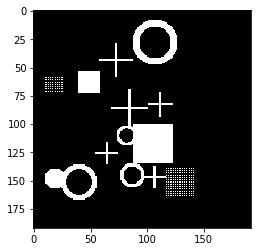

In [185]:
import torchvision.utils

def reverse_transform(inp):
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    inp = (inp * 255).astype(np.uint8)
    
    return inp

# Get a batch of training data
inputs, masks, _, _, _ = next(iter(dataloaders['train']))

print(inputs.shape, masks.shape)
for x in [inputs.numpy(), masks.numpy()]:
    print(x.min(), x.max(), x.mean(), x.std())

plt.imshow(reverse_transform(inputs[3]))

2
0 2
2
0 2
0
0 0
2
0 2
3
0 3
1
0 1


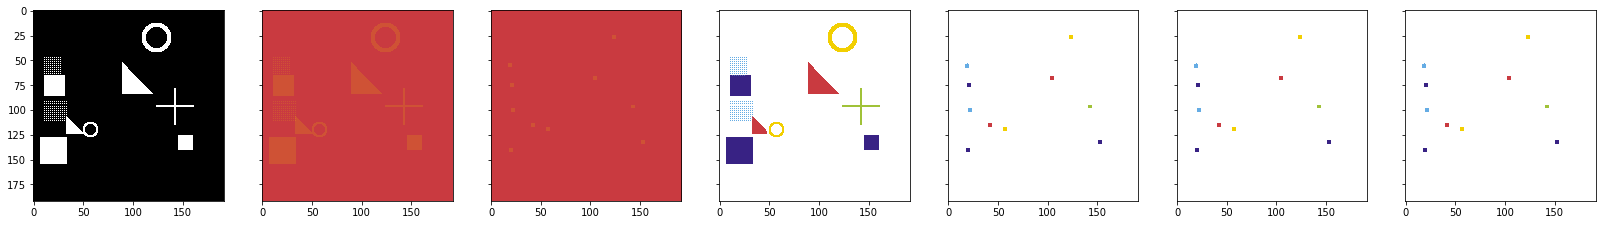

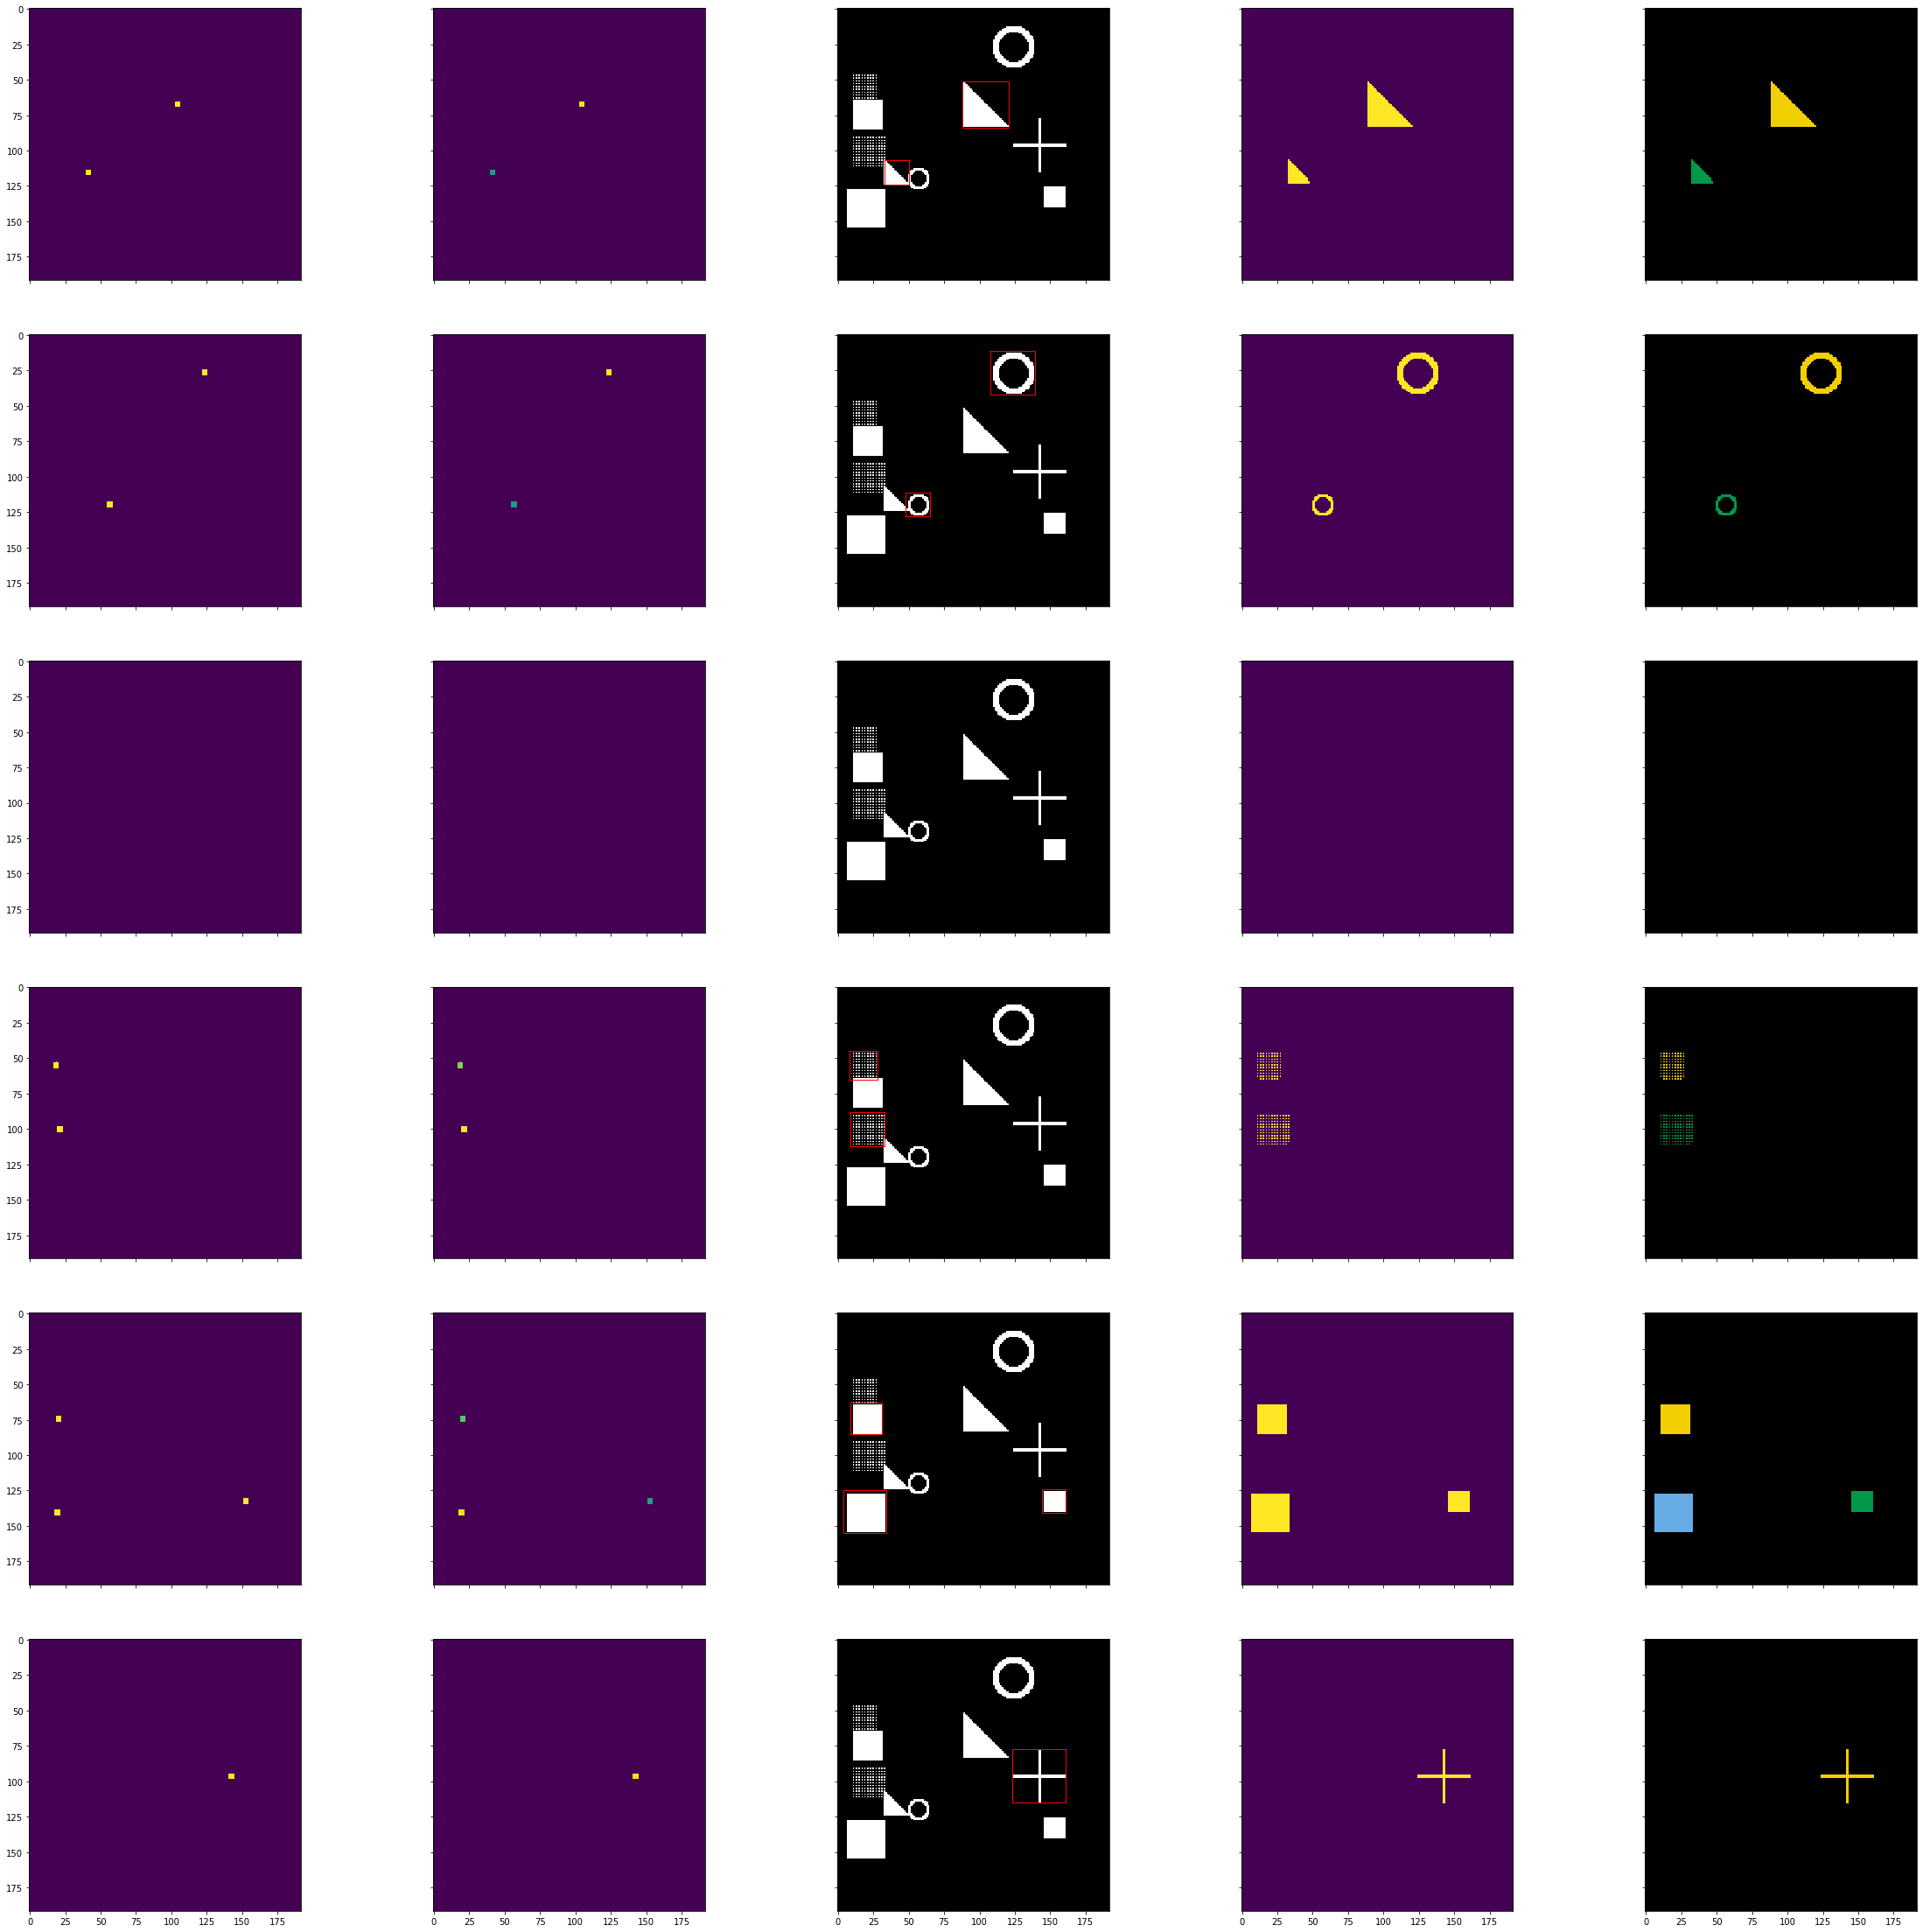

In [208]:
# prediction

import math

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_class = 2


model.eval()   # Set model to evaluate mode

test_dataset = SimDataset(1, n_class, transform = trans)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=0)
        
inputs, labels_mask, labels_center, labels_width, labels_height  = next(iter(test_loader))
inputs = inputs.to(device)
# labels_mask = labels_mask.to(device)
# labels_center = labels_center.to(device)

pred = model(inputs)
pred = pred[0]


# Change channel-order and make 3 channels for matplot
input_images_rgb = [reverse_transform(x) for x in inputs.cpu()]


# Map each channel (i.e. class) to each color
target_masks_rgb = [helper.masks_to_colorimg(x, n_class) for x in labels_mask]

# Map each channel (i.e. class) to each color
target_centers_rgb = [helper.masks_to_colorimg(x, n_class) for x in labels_center]

for i in [pred]:
    pred_masks = i['class_masks'].data.cpu().numpy()
    pred_centers = i['center_masks'].data.cpu().numpy()
    pred_widths = i['width_masks'].data.cpu().numpy()
    pred_heights = i['height_masks'].data.cpu().numpy()

    mask = pred_centers.copy() 
    mask[mask<0]=0
    mask[mask>0]=1

    
    pred_masks_rgb = [helper.masks_to_colorimg(x, n_class) for x in pred_masks]
    pred_centers_rgb = [helper.masks_to_colorimg(x, n_class) for x in mask] # pred_centers
    pred_widths_rgb = [helper.masks_to_colorimg(x, n_class) for x in pred_widths * mask]
    pred_heights_rgb = [helper.masks_to_colorimg(x, n_class) for x in pred_heights * mask]
    

    
# Left: Input image, Right: Target mask (Ground-truth)
helper.plot_side_by_side([input_images_rgb, target_masks_rgb, target_centers_rgb, pred_masks_rgb, pred_centers_rgb, pred_widths_rgb, pred_heights_rgb])


# -------

inp = np.copy(inputs.cpu())
img = np.copy(inp[0])
# img = img.reshape((192,192,3))
img = np.transpose(img,[1,2,0])
# img = img(:,:,[0])


from matplotlib import pyplot as plt
import matplotlib.patches as patches
from scipy.ndimage.measurements import label  


f, plots = plt.subplots(n_class, 5, sharex='all', sharey='all', figsize=(4 * 10, 4 * 10))


for i in range(n_class):
    a2 = np.copy(pred_centers[0,i,:,:])
    a2[a2<0]=0
    a2[a2>0]=1
    plots[i,0].imshow(a2)

    a4 = np.copy(pred_widths[0,i,:,:])     
    a4 = a4*a2 #.numpy()
    plots[i,1].imshow(a4)

    
    
    # finding connected components
    from scipy.ndimage.measurements import label  
    structure = np.ones((3, 3), dtype=np.int)
    labeled, ncomponents = label(a4, structure)
    indices = np.indices(a4.shape).T[:,:,[1, 0]]
    
    ax = plots[i,2] #plt.subplots(1)
    ax.imshow(img)
    coords = []
    for c in range(ncomponents):
        a = indices[labeled == c+1]
        x, y = (np.min(a[:,0]) + np.max(a[:,0]))//2, (np.min(a[:,1]) + np.max(a[:,1]))//2
        w, h = int(a4[x,y])+1, int(a4[x,y])+1
        coords.append( (x, y , w, h) )    
        rect = patches.Rectangle((y-w//2, x-h//2), w, h, linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)

        
    print(len(coords))
        
    semantic_mask = np.zeros(pred_masks.shape[2:])
    pred_masks_class = pred_masks[0,i,...]
    pred_masks_class[pred_masks_class<0] = 0
    pred_masks_class[pred_masks_class>0] = 1
    
    for box in coords:
        x, y, w, h = box
        w , h = w//2+1, h//2+1
        semantic_mask[x-w:x+w, y-h:y+h]  = 1
    plots[i,3].imshow(pred_masks_class * semantic_mask)
    
    
    instance_mask = np.zeros(pred_masks.shape[2:])
    pred_masks_class = pred_masks[0,i,...]
    pred_masks_class[pred_masks_class<0] = 0
    pred_masks_class[pred_masks_class>0] = 1
    xx = np.zeros(pred_masks.shape[2:], dtype=np.int)
    cc = 1
    for box in coords:
        x, y, w, h = box
        w , h = w//2+1, h//2+1
        instance_mask = np.zeros(pred_masks.shape[2:])
        instance_mask[x-w:x+w, y-h:y+h]  = 1
        mm = np.zeros(pred_masks.shape[2:], dtype=np.int)
        mm = pred_masks_class.astype(int) * instance_mask.astype(int) 
        mm = mm * cc
        xx = xx + mm
        xx[xx>cc] = cc
        cc += 1
    
#     xx = np.reshape(xx, [1,xx.shape[0], xx.shape[1]])
#     xx = xx[0,0,:,:]
    xx = xx.astype(int)
    print(np.min(xx), np.max(xx))
    plots[i,4].imshow(helper.masks_to_colorimg3(xx))

In [161]:
# pred_heights
# pred_masks
# pred_widths[0,0,:,:]
# torch.max(labels_center)
# type(pred_widths)
# pred_widths = pred_widths * labels_center.numpy()
# np.max(pred_widths)
# a = pred_centers 
# a[a<0]=0
# a[a>0]=1
# pred_masks[0].shape
# np.max(pred_centers[0])
# np.sum(mask)
# pred_masks.shape
# a2
# helper.plot_side_by_side([np.tile(a2,[3,1,1]), np.tile(a4,[3,1,1])])          
# np.transpose(np.tile(a2,[3,1,1]), [1,2,0]).shape
# a2.shape
# helper.plot_side_by_side([np.transpose(np.tile(a2,[3,1,1]),[1,2,0]), np.transpose(np.tile(a2,[3,1,1]),[1,2,0])])          
# for x in pred_masks:
#     print(x.shape)
# xx = pred_masks[0,i,...] * instance_mask
# xx = np.reshape(xx, [1,xx.shape[0], xx.shape[1]])
# xx.shape

np.min(xx)
xx.shape
np.max(pred_masks)
pred_masks.shape
# pred_masks.astype(int)


xx
pred_masks_class
instance_mask
pred_masks_class.astype(int) * instance_mask.astype(int)
cc
np.max(mm)

np.max(xx)

9

In [ ]:
# # np.where(aa==1)
# a = pred_centers[0,5,:,:]     
# a[a<0] = 0
# a[a>0] = 1
# np.where(a==1)
np.max(a2)
# print(np.sum(a2[a2>0]) )
# np.where(a2==np.max(a2))
# mask = np.zeros(a2.shape)
# mask.shape
# mask[np.where(a2==np.max(a2))] = 1
# a2 = a2 * mask

# x, y = np.where(a2==np.max(a2))
# print(x,y)
a2.shape

In [83]:
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# inp = np.copy(inputs.cpu())
# img = np.copy(inp[0])
# # img = img.reshape((192,192,3))
# img = np.transpose(img,[1,2,0])
# # img = img(:,:,[0])

In [45]:
# img.shape
# a2.shape
# f, plots = plt.subplots(n_class, 3, sharex='all', sharey='all', figsize=(4 * 4, 1 * 4))
# fig, ax = plots[3]
# x = plots[3]
ii

4

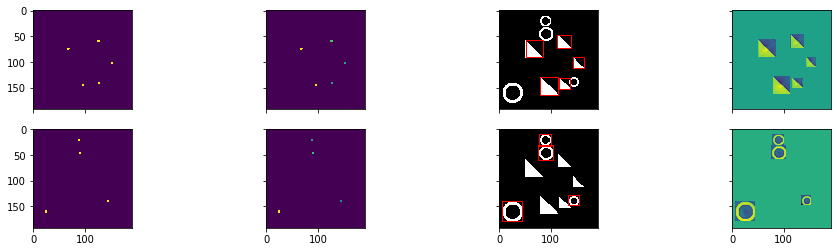

In [54]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches


f, plots = plt.subplots(n_class, 4, sharex='all', sharey='all', figsize=(4 * 4, 1 * 4))


for i in range(n_class):

#     a1 = np.copy(labels_center[0,i,:,:])
# #     a1 = a1.numpy()
    
#     plt.figure()
#     plt.imshow(a1)
#     plt.show()
    
    
    
    
    a2 = np.copy(pred_centers[0,i,:,:])
    a2[a2<0]=0
    a2[a2>0]=1
#     mask = np.zeros(a2.shape)
# #     mask.shape
#     mask[np.where(a2==np.max(a2))] = 1
#     a2 = a2 * mask 
#     a2 = a2 * -1




#     print(np.where(a2==np.max(a2)))
#     plt.figure()
#     plt.imshow(a2)
#     plt.show()
    plots[i,0].imshow(a2)

    
    
#     a3 = np.copy(labels_width[0,i,:,:])
# #     a3 = a3.numpy()
# #     print(np.sum(a3[a3>0]))
#     print(np.where(a3==np.max(a3)))
#     plt.figure()
#     plt.imshow(a3)
#     plt.show()
    
    
    a4 = np.copy(pred_widths[0,i,:,:])     
    a4 = a4*a2 #.numpy()
#     print(np.sum(a4[a4>0]))
#     b[b<0] = 0
#     b[b>0] = 1
#     print(b.shape)
#     print(np.where(a4==np.max(a4)))
#     plt.figure()
#     plt.imshow(a4)
#     plt.show()
    plots[i,1].imshow(a4)

    
    
    # finding connected components
    from scipy.ndimage.measurements import label  
    structure = np.ones((3, 3), dtype=np.int)
    labeled, ncomponents = label(a4, structure)
    indices = np.indices(a4.shape).T[:,:,[1, 0]]
    
#     res  = []
    ax = plots[i,2] #plt.subplots(1)
    ax.imshow(img)
    coords = []
    for c in range(ncomponents):
        a = indices[labeled == c+1]
#         res.append((np.min(a[:,0]), np.min(a[:,1]), np.max(a[:,0]), np.max(a[:,1])))
        x, y = (np.min(a[:,0]) + np.max(a[:,0]))//2, (np.min(a[:,1]) + np.max(a[:,1]))//2
        w, h = int(a4[x,y]), int(a4[x,y])
        coords.append( (x, y , w, h) )    
#         img = cv2.rectangle(img,(x,y),(x+int(a4[x,y]),y+int(a4[x,y])),(0,255,0),3)  
        # Create figure and axes
        # Display the image
        # Create a Rectangle patch
        rect = patches.Rectangle((y-w//2, x-h//2), w, h, linewidth=1,edgecolor='r',facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)

#     plt.show()  
#     plots[i,2].show()

#     print(coords)
    
#     cv2.imshow('test', img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    
    
    instance_mask = np.zeros(pred_masks.shape[2:])
    for box in coords:
        x, y, w, h = box
        w , h = w//2, h//2
        instance_mask[x-w:x+w, y-h:y+h]  = 1
    
    plots[i,3].imshow(pred_masks[0,i,...] * instance_mask)
    
    
    
    
    
    
#     img = np.zeros(a2.shape)
#     x, y = np.where(mask==1)
#     print(x,y)
#     for i,j in zip(x,y):
#         w = 5 #int(a4[i,j]//2)
#         h = 5 #int(a4[i,j]//2)  # update
#         img[i-w, j-h:j+h] = 1
#         img[i+w, j-h:j+h] = 1
#         img[i-w:i+w, j-h] = 1
#         img[i-w:i+w, j+h] = 1
# #         img[0,i-w, j-h:j+h] = 255
# #         img[i-w:j-h, i-w:j+h, i-w:j-h, i-w:j+h, i-w:j-h, i-w:j+h ] = 1        
    
    

    
    
    
    
    
#     print('-------------------------------------')
    
    
    
    
# a[a>0]
# torch.argmax(a)



# torch.sum(labels_center[0,1,:,:])

In [51]:
(pred_masks[0,...] * instance_mask).shape

(2, 192, 192)

In [41]:
# coords
# img = cv2.rectangle(img,(x,y),(x+int(a4[x,y]),y+int(a4[x,y])),(0,255,0),3)  
# np.array(img)
# img
# pred_centers[0,i,:,:]
pred_masks.shape[2:]

(192, 192)

In [ ]:
img = np.copy(inputs[0])
# import cv2

img2 = img.reshape((192,192,3))
cv2.imshow('test', img)
cv2.waitKey()

In [344]:
from scipy.ndimage.measurements import label  
    structure = np.ones((3, 3), dtype=np.int)
    labeled, ncomponents = label(a4, structure)
    indices = np.indices(a4.shape).T[:,:,[1, 0]]
    
    res  = []
    coords = []
    for i in range(ncomponents):
        a = indices[labeled == i+1]
        res.append((np.min(a[:,0]), np.min(a[:,1]), np.max(a[:,0]), np.max(a[:,1])))
        x , y = (np.min(a[:,0]) + np.max(a[:,0]))//2, (np.min(a[:,1]) + np.max(a[:,1]))//2
        coords.append( (x, y , a4[x,y], a4[x,y]) )

In [341]:
res

[(17, 160, 20, 163), (33, 75, 37, 79), (108, 97, 110, 99)]

In [345]:
res

[(17, 160, 20, 163), (33, 75, 37, 79), (108, 97, 110, 99)]

In [346]:
coords

[(18, 161, 17.918903, 17.918903),
 (35, 77, 20.881758, 20.881758),
 (109, 98, 16.621855, 16.621855)]

In [71]:
b = pred_widths[0,1,:,:]
print(b)
# b = pred_centers[0,1,:,:]
# # b[b<0] = 0
# b[b<0] = 0
# b[b>0] = 1
sum(sum(b))

[[0. 1. 0. ... 1. 1. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 1.]
 [1. 1. 1. ... 0. 0. 1.]
 [0. 1. 1. ... 1. 1. 1.]]


35580.0

In [75]:
# len(labels_mask[0])
# len(pred)
# len(labels_mask)
# len(pred[0])
# [pred]
pred_centers
# pred_masks.shape
# pred = model(inputs)

array([[[[  -5.032528 ,   -9.069246 ,  -11.0725975, ...,  -18.062944 ,
           -15.51245  ,  -10.010572 ],
         [  -9.196355 ,  -17.706951 ,  -21.741497 , ...,  -34.291756 ,
           -29.002335 ,  -18.156494 ],
         [ -11.168331 ,  -21.410812 ,  -26.218115 , ...,  -41.23322  ,
           -34.919113 ,  -21.457184 ],
         ...,
         [ -13.30439  ,  -26.23891  ,  -32.104836 , ...,  -10.452716 ,
            -8.894147 ,   -5.339455 ],
         [ -11.202439 ,  -21.98139  ,  -26.849098 , ...,   -8.646945 ,
            -7.3632936,   -4.436797 ],
         [  -5.8298855,  -11.590156 ,  -14.128543 , ...,   -4.583211 ,
            -3.9242194,   -2.1376426]],

        [[ -16.526638 ,  -29.02168  ,  -34.391876 , ...,  -50.839127 ,
           -42.54017  ,  -23.828386 ],
         [ -27.704456 ,  -47.88201  ,  -57.233364 , ...,  -86.15812  ,
           -72.2221   ,  -41.6403   ],
         [ -33.301857 ,  -57.20471  ,  -68.31884  , ..., -102.759926 ,
           -86.12076  ,  -49.6986

In [64]:
# len(pred)
list(enumerate(pred))

[(0, 'shared_feature_maps'), (1, 'class_masks'), (2, 'center_masks')]

In [57]:
pred['class_masks'].data.cpu().numpy()

array([[[[ -22.037907 ,  -35.910973 ,  -43.16165  , ...,  -68.02143  ,
           -58.01715  ,  -35.53316  ],
         [ -34.984917 ,  -58.108006 ,  -69.87346  , ..., -109.87455  ,
           -93.75773  ,  -57.98214  ],
         [ -41.141956 ,  -68.22731  ,  -81.86617  , ..., -128.51053  ,
          -109.66394  ,  -67.77998  ],
         ...,
         [ -52.740704 ,  -86.93795  , -103.59356  , ...,  -38.46233  ,
           -32.87971  ,  -20.186821 ],
         [ -44.24007  ,  -72.836555 ,  -86.74671  , ...,  -32.284966 ,
           -27.568083 ,  -16.898193 ],
         [ -26.68028  ,  -43.386044 ,  -51.57912  , ...,  -19.314909 ,
           -16.471737 ,   -9.847503 ]],

        [[ -33.25004  ,  -55.79255  ,  -67.13716  , ..., -100.24596  ,
           -83.697105 ,  -49.547302 ],
         [ -55.45316  ,  -93.890724 , -113.14113  , ..., -170.33737  ,
          -142.55968  ,  -85.64638  ],
         [ -65.919815 , -111.512405 , -134.28783  , ..., -202.3194   ,
          -169.40408  , -101.7645